In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 설정 변수 정의

# 이미지 리스트(npy)
image_list = np.load("/src/hyebin/deeplab_v3/train_data_256.npy", allow_pickle=True)
image_list = np.squeeze(image_list, axis=3)

# 행(x)
row = 5
# 열(y)
col = 6

In [3]:
print(image_list.shape)

(537, 256, 256)


이미지리스트를 조건(x개수, y개수)에 따라 합침

이미지의 총 개수가 6개이고,<br>
x개수가 2, y개수가 3이면,

image1, image2<br>
image3, image4<br>
image5, image6<br>
의 형태로 합친 후 결과를 반환

※ 파라미터 체크 사항<br>
1.이미지리스트는 null이면 null로 리턴<br>
2.x개수가 0 이하이면, 예외발생<br>
3.y개수가 0 이하이면, 예외발생<br>
4.이미지리스트의 이미지 총개수 = x개수 * y개수<br>
5.처음 파라미터에서 이미지리스트 타입 체크<br>
npy인지, 일반 배열인지, 둘다 아니면 return<br>
일반 배열이면 npy로 바꾸는 작업 필요

In [4]:
# 이미지 가져올 시작 위치 정하기
base_index = 0
image_list = image_list[base_index:base_index + (row*col)]  # 총 6개 이미지 (2*3)
print(image_list.shape)  # (6,256,256)
    
# 변수 할당
img_arr = []
for i in range(row*col):  # 총 개수만큼 이미지 변수 할당
    img_arr.append(image_list[i:i+1])

(30, 256, 256)


In [5]:
## 열 합치기 함수
cnt = 0
def get_concat_h_repeat(img_arr):
    global cnt
    
    if cnt == 0:
        img1 = np.concatenate((img_arr[0:0+col]), axis=2)  # [0:3] → 0, 1, 2   
    else:
        img1 = np.concatenate((img_arr[0+(cnt*col):0+(cnt*col)+col]), axis=2)  # [3:6] → 3, 4, 5  cnt = 1   

#         print('img1:',img1.shape)
#         plt.figure(1)
#         plt.subplot(1, 1, 1)
#         plt.imshow(img1.reshape([256,256*col]), cmap='gray')
#         plt.show()
    
    cnt += 1
#     print('cnt:',cnt)
        
    return img1

In [6]:
## 행 합치기 함수
def get_concat_v_repeat(img1, img_arr):

    row_list = []

    for y in range(row-1):  
        img2 = get_concat_h_repeat(img_arr)
        row_list.append(img2)
#         print('row_list=',len(row_list))
        
#         print('img2:',img2.shape)
#         plt.figure(1)
#         plt.subplot(1, 1, 1)
#         plt.imshow(img2.reshape([256,256*col]), cmap='gray')
#         plt.show()
        
    # 일단 한번 행 합치고
    temp = np.concatenate((img1, row_list[0]), axis=1)
    
#     print('temp:',temp.shape)
#     plt.figure(1)
#     plt.subplot(1, 1, 1)
#     plt.imshow(temp.reshape([256*2,256*col]), cmap='gray')
#     plt.show()
    
    for x in range(row-2):
        temp = np.concatenate((temp, row_list[x+1]), axis=1)
        
#         print('temp:',temp.shape)
#         plt.figure(1)
#         plt.subplot(1, 1, 1)
#         plt.imshow(temp.reshape([256*(x+(row-1)),256*col]), cmap='gray')
#         plt.show()
    
    print('result:',temp.shape)
    plt.figure(1)
    plt.subplot(1, 1, 1)
    plt.imshow(temp.reshape([256*row,256*col]), cmap='gray')
    plt.show()
    
    return None

In [7]:
## 열과 행 합치기 함수
def get_concat_tile_repeat(img_arr):
    dst_h1 = get_concat_h_repeat(img_arr)
    
    return get_concat_v_repeat(dst_h1, img_arr)

result: (1, 1280, 1536)


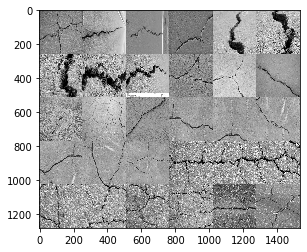

In [8]:
get_concat_tile_repeat(img_arr)